<a href="https://colab.research.google.com/github/technisekai/sentiment-analysis-of-new-halal-logo/blob/main/2_preanalisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Preanalisis Data**

Proses ini meliputi visualisasi data dalam bentuk grafik untuk mengetahui data lebih mendalam untuk menentukan kernel yang akan digunakan. Selanjutnya akan membahas [**pengolahan data**](https://colab.research.google.com/drive/1SDDYkFFTtH4LmJ4yzQ-N_zSzoG-JVgw3) meliputi: 


*   Data Cleansing
*   Labeling Data
*   Split Data 
*   TF-IDF
*   Oversampling dan Undersampling
*   Implementasi SVM dan Evaluasi


Proses Sebelumnya : [**1. Pengumpulan Data**](https://colab.research.google.com/drive/16RWvGKvZBL8D2b3KKWW7y7nerkUBfZM2#scrollTo=Wm0ngXLVG-Mv)

Proses Selanjutnya : [**3. Pengolahan Data**](https://colab.research.google.com/drive/1SDDYkFFTtH4LmJ4yzQ-N_zSzoG-JVgw3)


## 2.1 Install dan Impor Library

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 29.5 MB/s 


In [ ]:
# download stopword file
!gdown --id 19nlMainHfItPZ4_9K1yS3WZgk8nJW1p5
# download file normalisasi kata
!gdown --id 1cINKFxiSycaOwVY5O5SPAxEwuhKRvqSz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19nlMainHfItPZ4_9K1yS3WZgk8nJW1p5
To: /content/stopwordbahasa.csv
100% 6.45k/6.45k [00:00<00:00, 10.6MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cINKFxiSycaOwVY5O5SPAxEwuhKRvqSz
To: /content/new_kamusalay.csv
100% 286k/286k [00:00<00:00, 103MB/s]


In [ ]:
import cv2
import re
import pandas as pd
import imblearn
import warnings
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import metrics as m
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter

warnings.filterwarnings('ignore')

# preparing var to stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# preparing normalize word
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
# preparing remove stopword
id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

## 2.2 Persiapan Dataset

In [ ]:
# impor data yang sudah di labeli dan normalisasi kata
df = pd.read_csv('/content/drive/MyDrive/Dataset/tugas-akhir/labeled/logo-halal-labeled-with-indonesia-sentiment.csv')

In [ ]:
# jumlah data
df.shape

(1000, 9)

In [ ]:
# mendefinisikan warna untuk grafik
spring_pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

## 2.3 Data Cleansing

In [ ]:
import re

# lowercase
def lowercase(text):
    return text.lower()

# remove uncertain word in sentence
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    #text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('@[^\s]+',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

# remove non-alphanumeruic   
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

# stemming
def stemming(text):
    return stemmer.stem(text)

# normalization
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

# remove stopword
def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

In [ ]:
# preprocessing using function defined above
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_unnecessary_char(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = normalize_alay(text) # 4
    text = remove_stopword(text) # 6
    text = stemming(text) # 5
    return text

In [ ]:
df['clean_tweet'] = df['normalization_tweet'].apply(preprocess)

## 2.4 Visualisasi Data

Text(1.9, 186, '186')

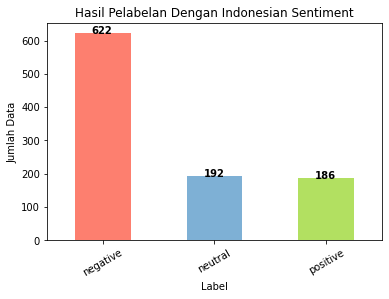

In [ ]:
# plot jumlah label yang dihasilkan
df['sentiment'].value_counts().plot(kind='bar', 
                                    color=spring_pastels, 
                                    title='Hasil Pelabelan Dengan Indonesian Sentiment', 
                                    xlabel='Label', 
                                    ylabel='Jumlah Data')

# memberi detail jumlah data tiap label
plt.xticks(rotation=30, horizontalalignment="center")
plt.text(-0.1, 622, 622, color='black', fontweight='bold')
plt.text(0.9, 192, 192, color='black', fontweight='bold')
plt.text(1.9, 186, 186, color='black', fontweight='bold')

### 2.4.1 Split dan Label Processing

Dilakukan label processing yaitu mengubah label yang berupa positif, netral, negatif ke bentuk numeric. Selanjutnya dilakukan split data dan vektorisasi menggunakan tf-idf.

In [ ]:
def labeling(label):
  if label == 'positive':
    return 1
  elif label == 'negative':
    return -1
  else:
    return 0

In [ ]:
df['label'] = df['sentiment'].apply(labeling)

In [ ]:
X = df['clean_tweet'].values
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
tf_idf.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train = tf_idf.transform(X_train).toarray()
X_test = tf_idf.transform(X_test).toarray()

### 2.4.2 Visualisasi Persebaran Data

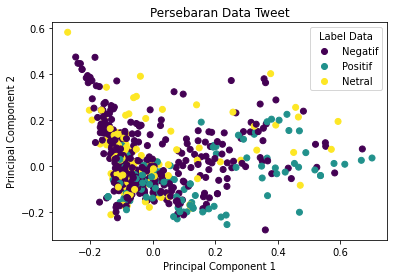

In [ ]:
from sklearn.decomposition import PCA

# reduksi dimensi dengan pca
pca = PCA()
Xt = pca.fit_transform(X_train)

# tampilkan grafik data dalam 2 dimensi
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_train)

# tampilkan
plt.legend(handles=plot.legend_elements()[0], labels=('Negatif', 'Positif', 'Netral'), title='Label Data')
# keterangan
plt.title('Persebaran Data Tweet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()